In [1]:
import numpy as np
import os
import skimage.io as skio
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
tifs_path = os.path.join(indir, "tifs")

In [2]:
# create an empty list to store the tif files
tif_list = []

# loop through all tif files in the folder and append to the list
for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        # read the tif file and normalize the data
        tif_data = io.imread(tif_file).astype(np.float32)
        tif_data /= 255.0
        tif_data -= np.mean(tif_data)
        tif_list.append(tif_data)

# convert the list to a numpy array
tifs = np.array(tif_list)

# Loop through tif_patches_array and print the shape of each array
for i, tifs in enumerate(tifs):
    print(f"TIF {i}: shape = {tifs.shape}")

TIF 0: shape = (5100, 6600, 3)
TIF 1: shape = (5100, 6600, 4)
TIF 2: shape = (5100, 6600, 3)
TIF 3: shape = (5100, 6600, 3)
TIF 4: shape = (5100, 6600, 4)
TIF 5: shape = (5100, 6600, 3)
TIF 6: shape = (5100, 6600, 3)
TIF 7: shape = (24000, 23700, 3)
TIF 8: shape = (5100, 6600, 4)
TIF 9: shape = (5100, 6600, 4)
TIF 10: shape = (5100, 6600, 4)
TIF 11: shape = (5101, 6600, 3)
TIF 12: shape = (5100, 6600, 3)
TIF 13: shape = (5100, 6600, 3)
TIF 14: shape = (24000, 23700, 3)
TIF 15: shape = (5100, 6600, 3)
TIF 16: shape = (5100, 6600, 4)
TIF 17: shape = (5100, 6600, 3)
TIF 18: shape = (5100, 6600, 3)
TIF 19: shape = (18000, 24000, 4)
TIF 20: shape = (5100, 6600, 3)
TIF 21: shape = (5100, 6600, 4)
TIF 22: shape = (5100, 6600, 3)


C:\Users\Nissim\AppData\Local\Temp\ipykernel_56192\2275727195.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tifs = np.array(tif_list)


We noticed here that some of the TIFs seem to be importing with an extra channel in addition to RGB. We weren't sure why, so we printed out the images.

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site17.tif does not have 4 channels


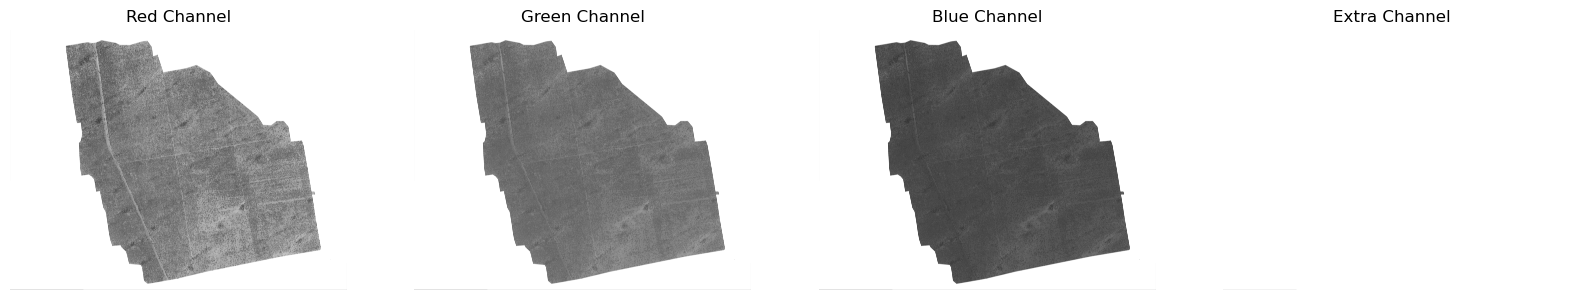

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site8.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site2.tif does not have 4 channels


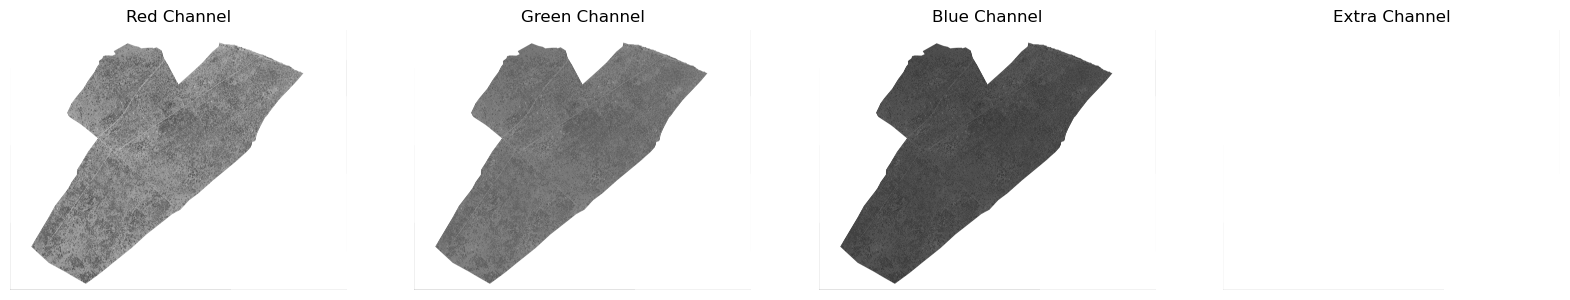

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site16.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site14.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site21.tif does not have 4 channels


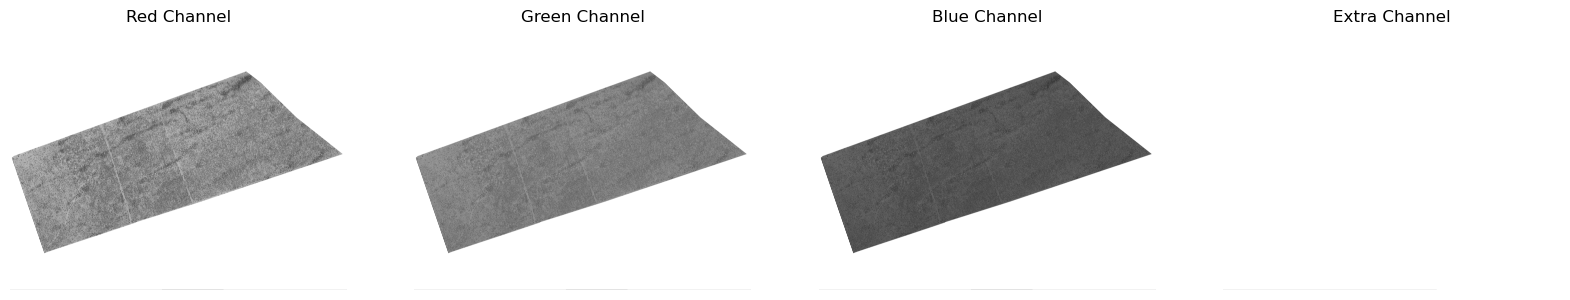

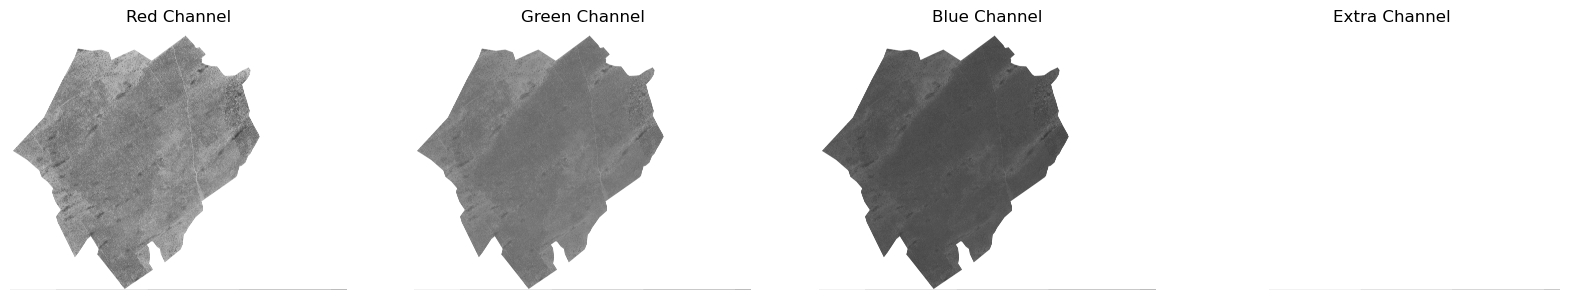

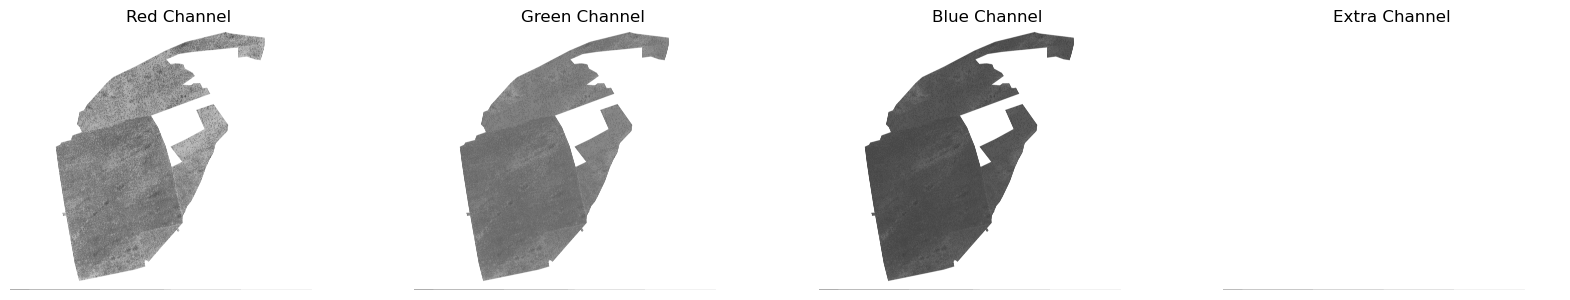

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site15.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site20.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site24.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site6.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site10.tif does not have 4 channels


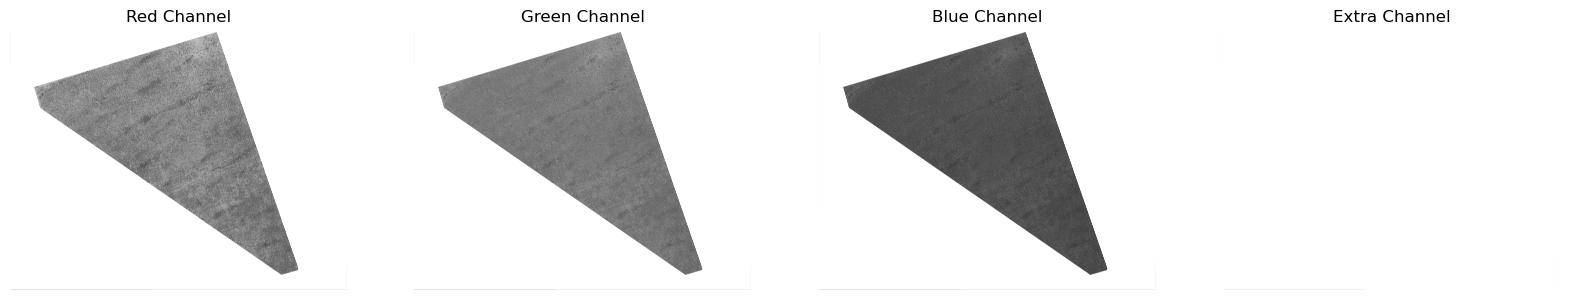

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site18.tif does not have 4 channels
Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site23.tif does not have 4 channels


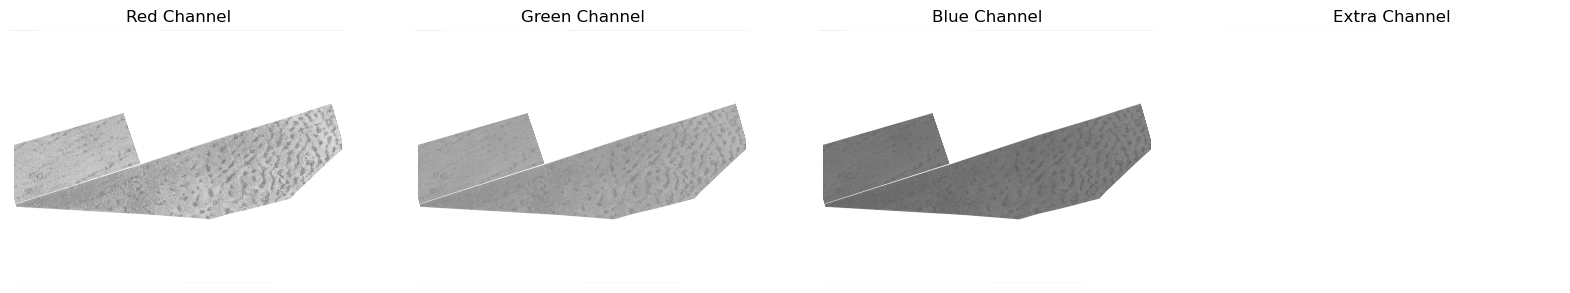

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site1.tif does not have 4 channels


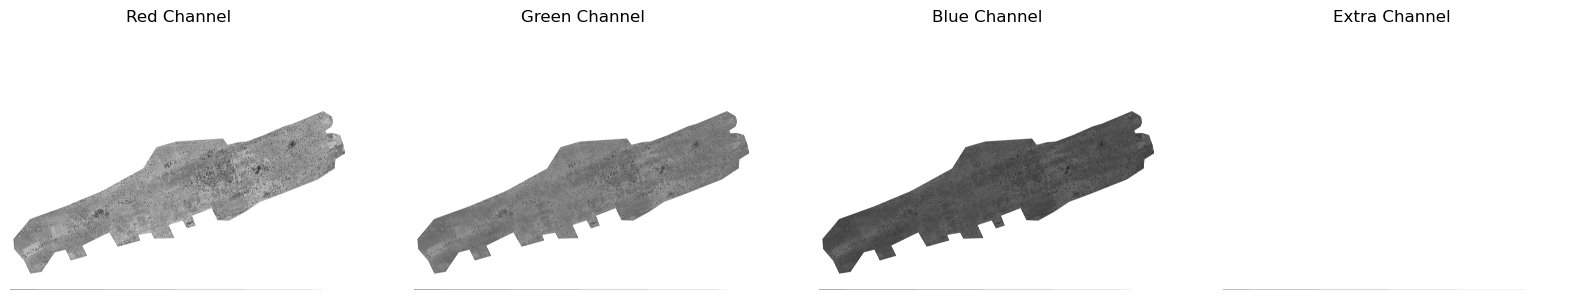

Image G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\tifs\site3.tif does not have 4 channels


In [3]:
def visualize_channels(image_path):
    img = skio.imread(image_path)
    height, width, channels = img.shape

    if channels != 4:
        print(f"Image {image_path} does not have 4 channels")
        return

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    channel_names = ['Red', 'Green', 'Blue', 'Extra']

    for i in range(4):
        axs[i].imshow(img[:, :, i], cmap='gray')
        axs[i].set_title(f'{channel_names[i]} Channel')
        axs[i].axis('off')

    plt.show()

tifs_path = os.path.join(indir, "tifs")

for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        visualize_channels(tif_file)

We noticed that the extra channel is always black, so we decided to remove it.

In [4]:
def extract_and_pad_patches(image, patch_size=(256, 256, 3), stride=256):
    patches = []
    height, width, channels = image.shape

    # If the image has more than 3 channels, extract only the first 3 (assumes RGB)
    if channels > 3:
        image = image[:, :, :3]

    for y in range(0, height, stride):
        for x in range(0, width, stride):
            patch = image[y:y+patch_size[0], x:x+patch_size[1], :]

            # Check if padding is needed
            if patch.shape[0] < patch_size[0] or patch.shape[1] < patch_size[1]:
                pad_height = patch_size[0] - patch.shape[0]
                pad_width = patch_size[1] - patch.shape[1]

                # Pad the patch with zeros (black)
                patch = np.pad(
                    patch,
                    pad_width=((0, pad_height), (0, pad_width), (0, 0)),
                    mode='constant',
                    constant_values=0
                )

            patches.append(patch)

    return patches

In [5]:
# create an empty list to store the tif files
tif_patches_list = []

# loop through all tif files in the folder and append to the list
for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        img = skio.imread(tif_file)

        # Extract and pad patches from the image
        patches = extract_and_pad_patches(img)
        tif_patches_list.append(patches)

# convert each list of patches to a numpy array
tif_patches_array = [np.array(patches) for patches in tif_patches_list]

In [6]:
print(len(tif_patches_array))

23


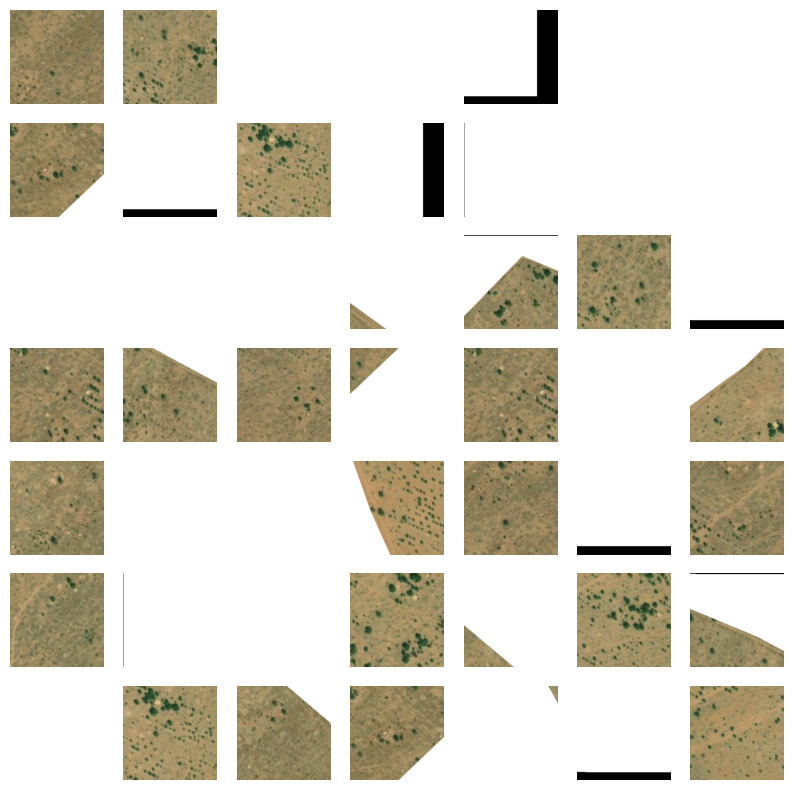

In [7]:
# print 49 random images from tif_patches_array in a 7x7 grid, but with no borders or axes
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(tif_patches_array[0][np.random.randint(0, len(tif_patches_array[0]))])
    ax.axis('off')

In [8]:
# Loop through tif_patches_array and print the shape of each array
for i, patches in enumerate(tif_patches_array):
    print(f"Array {i}: shape = {patches.shape}")

Array 0: shape = (520, 256, 256, 3)
Array 1: shape = (520, 256, 256, 3)
Array 2: shape = (520, 256, 256, 3)
Array 3: shape = (520, 256, 256, 3)
Array 4: shape = (520, 256, 256, 3)
Array 5: shape = (520, 256, 256, 3)
Array 6: shape = (520, 256, 256, 3)
Array 7: shape = (8742, 256, 256, 3)
Array 8: shape = (520, 256, 256, 3)
Array 9: shape = (520, 256, 256, 3)
Array 10: shape = (520, 256, 256, 3)
Array 11: shape = (520, 256, 256, 3)
Array 12: shape = (520, 256, 256, 3)
Array 13: shape = (520, 256, 256, 3)
Array 14: shape = (8742, 256, 256, 3)
Array 15: shape = (520, 256, 256, 3)
Array 16: shape = (520, 256, 256, 3)
Array 17: shape = (520, 256, 256, 3)
Array 18: shape = (520, 256, 256, 3)
Array 19: shape = (6674, 256, 256, 3)
Array 20: shape = (520, 256, 256, 3)
Array 21: shape = (520, 256, 256, 3)
Array 22: shape = (520, 256, 256, 3)


In [9]:
# Concatenate all of the images in tif_patches_array into a single array
tif_patches_full = np.concatenate(tif_patches_array, axis=0)

In [10]:
tif_patches_full.shape

(34558, 256, 256, 3)

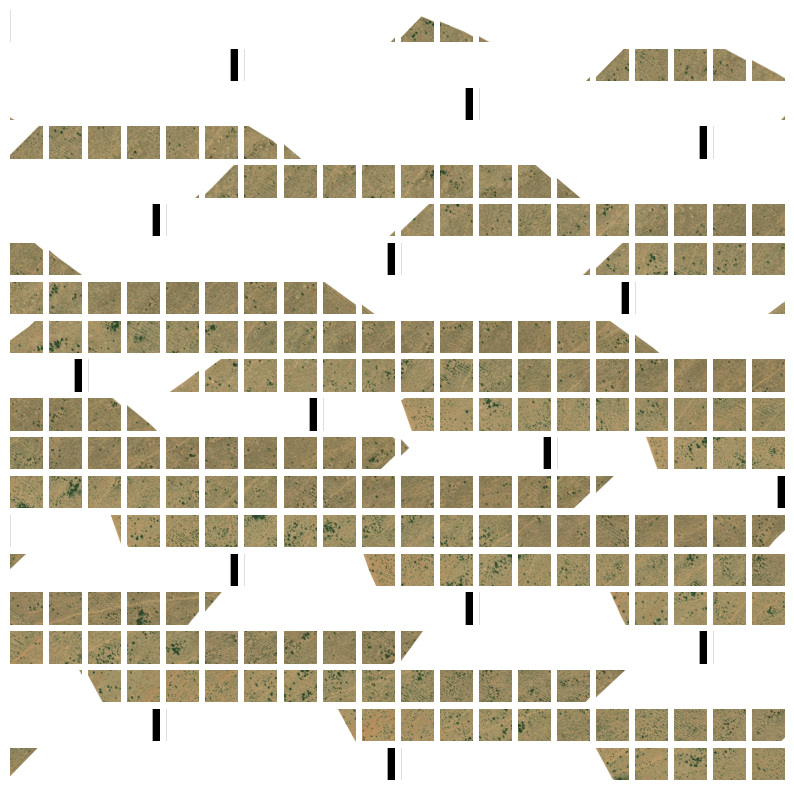

In [11]:
# print the first 49 images from tif_patches_full in a 7x7 grid, but with no borders or axes
fig, axes = plt.subplots(20, 20, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(tif_patches_full[i])
    ax.axis('off')

In [12]:
import tensorflow as tf

tf.test.is_gpu_available()

In [ ]:
print(tf.config.list_physical_devices('GPU'))

In [ ]:
# split the data into training, validation, and testing sets with a 40/30/30 split
from sklearn.model_selection import train_test_split

# Split the original dataset into a training set and a temporary set
train, temp = train_test_split(tif_patches_full, test_size=0.6, random_state=42)

# Split the temporary set into a validation set and a testing set
val, test = train_test_split(temp, test_size=0.5, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from sklearn.cluster import KMeans
from skimage.color import label2rgb
import matplotlib.pyplot as plt

In [ ]:
def unet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    u4 = UpSampling2D((2, 2))(c3)
    u4 = Concatenate()([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(c5)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
import sys

num_classes = 3
num_pixels_per_image = 1000
np.random.seed(42)

# Sample pixels from all images in the dataset
sampled_pixels = []
total_images = len(train)
for idx, image in enumerate(train):
    reshaped_image = np.reshape(image, (-1, 3))
    indices = np.random.choice(len(reshaped_image), num_pixels_per_image, replace=False)
    sampled_pixels.append(reshaped_image[indices])

    # Print progress
    print(f"Sampling pixels from image {idx + 1} of {total_images}", end='\r')
    sys.stdout.flush()

sampled_pixels = np.vstack(sampled_pixels)

# Fit K-means model using the sampled pixels
kmeans = KMeans(n_clusters=num_classes)
kmeans.fit(sampled_pixels)

In [ ]:
import sys
import concurrent.futures

def predict_pseudo_labels(image):
    reshaped_image = np.reshape(image, (-1, 3))
    kmeans_labels = kmeans.predict(reshaped_image)
    return np.reshape(kmeans_labels, (256, 256))

# Predict pseudo-labels for all images using the fitted K-means model and parallel processing
total_images = len(train)

with concurrent.futures.ThreadPoolExecutor() as executor:
    future_results = {executor.submit(predict_pseudo_labels, image): idx for idx, image in enumerate(train)}
    pseudo_labels = [None] * total_images

    for future in concurrent.futures.as_completed(future_results):
        idx = future_results[future]
        pseudo_labels[idx] = future.result()

        # Print progress
        completed_count = len([label for label in pseudo_labels if label is not None])
        print(f"Predicting pseudo-labels for image {completed_count} of {total_images}", end='\r')
        sys.stdout.flush()

pseudo_labels = np.array(pseudo_labels)

In [ ]:
model = unet(input_shape=(256, 256, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_images = train
train_pseudo_labels = pseudo_labels

num_epochs = 20
model.fit(train_images, train_pseudo_labels, epochs=num_epochs, batch_size=8)

In [ ]:
sample_image_idx = 0  # Change the index to visualize a different image
sample_image = train[sample_image_idx]
sample_label = pseudo_labels[sample_image_idx]

segmented_image = model.predict(sample_image[np.newaxis, ...])[0]
segmented_image = np.argmax(segmented_image, axis=-1)

# Visualize the input image, the pseudo-label, and the segmented image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sample_image)
axes[0].set_title('Input Image')

axes[1].imshow(label2rgb(sample_label, image=sample_image, bg_label=0))
axes[1].set_title('Pseudo-label')

axes[2].imshow(label2rgb(segmented_image, image=sample_image, bg_label=0))
axes[2].set_title('Segmented Image')

plt.show()